# Delaney ML Project

## Load Dataset

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


## Splitting Data

In [2]:
y = df['logS']
x = df.drop('logS', axis = 1)
x.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.5954,167.850,0.0,0.0
1,2.3765,133.405,0.0,0.0
2,2.5938,167.850,1.0,0.0
3,2.0289,133.405,1.0,0.0
4,2.9189,187.375,1.0,0.0


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

### Linear Regression 

#### Model Building

In [4]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)

y_lr_train_predict = lr.predict(x_train)
y_lr_test_predict = lr.predict(x_test)

#### Model Evaluation

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

y_lr_train_mean = mean_squared_error(y_train, y_lr_train_predict)
y_lr_train_r2 = r2_score(y_train, y_lr_train_predict)

y_lr_test_mean = mean_squared_error(y_test, y_lr_test_predict)
y_lr_test_r2 = r2_score(y_test, y_lr_test_predict)

In [6]:
lr_results = pd.DataFrame(["Linear Regression", y_lr_train_mean, y_lr_train_r2, y_lr_test_mean, y_lr_test_r2]).transpose()
lr_results.columns = ["Model", "Training MSE", "Training R2", "Test MSE", "Test R2"]

#### Linear Regression Results

In [7]:
lr_results

,Model,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


### Random Forest

#### Model Building

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)

rf.fit(x_train, y_train)

y_rf_train_predict = rf.predict(x_train)
y_rf_test_predict = rf.predict(x_test)

#### Model Evaluation

In [9]:
y_rf_train_mean = mean_squared_error(y_train, y_rf_train_predict)
y_rf_train_r2 = r2_score(y_train, y_rf_train_predict)

y_rf_test_mean = mean_squared_error(y_test, y_rf_test_predict)
y_rf_test_r2 = r2_score(y_test, y_rf_test_predict)

In [10]:
rf_results = pd.DataFrame(["Random Forest Regressor", y_rf_train_mean, y_rf_train_r2, y_rf_test_mean, y_rf_test_r2]).transpose()
rf_results.columns = ["Model", "Training MSE", "Training R2", "Test MSE", "Test R2"]

#### Random Forest Regressor Results

In [11]:
rf_results

,Model,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Regressor,1.028228,0.759669,1.407688,0.709223


### Combine Data Into One DataFrame

In [12]:
model_results = pd.concat([lr_results, rf_results], axis = 0)
model_results

,Model,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest Regressor,1.028228,0.759669,1.407688,0.709223


### Model Performance Visualization

Text(0.5, 1.0, 'Linear Regression Model Visualization : Experimental vs Predicted')

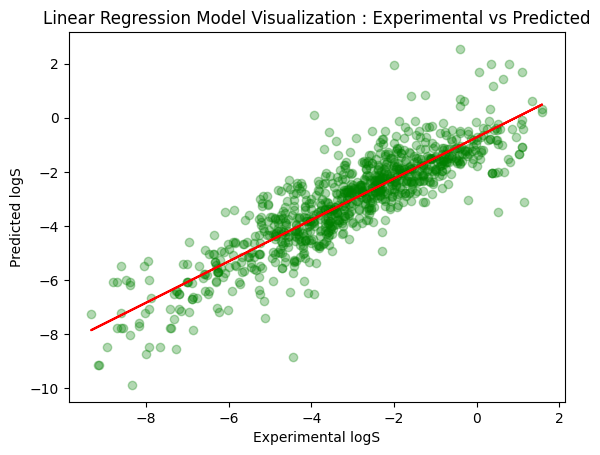

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = y_train, y = y_lr_train_predict, color = 'green', alpha = 0.3)

x = np.polyfit(y_train, y_lr_train_predict, 1)
p = np.poly1d(x)

plt.plot(y_train, p(y_train), color = 'red')

plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.title("Linear Regression Model Visualization : Experimental vs Predicted")

Text(0.5, 1.0, 'Random Forest Regressor Model Visualization : Experimental vs Predicted')

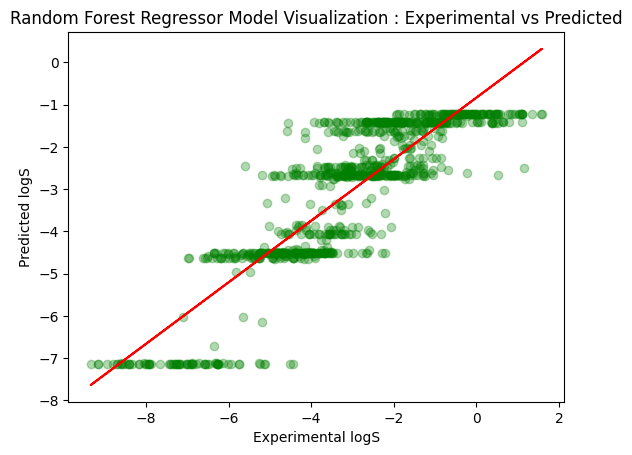

In [14]:
plt.scatter(x = y_train, y = y_rf_train_predict, color = 'green', alpha = 0.3)

x_rf = np.polyfit(y_train, y_rf_train_predict, 1)
p_rf = np.poly1d(x_rf)

plt.plot(y_train, p_rf(y_train), color = 'red')

plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
plt.title("Random Forest Regressor Model Visualization : Experimental vs Predicted")